<a href="https://colab.research.google.com/github/TihamHossainKhan/Support-Vector-Machine-Project/blob/master/SVM_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Support Vector Machines</h1>

## Linearly separable classes:

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#for advanced plotting style
import seaborn as sns
sns.set()

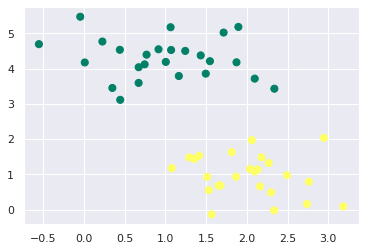

In [176]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

## Many possible separators:

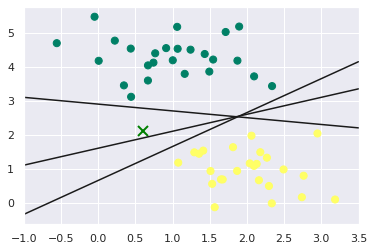

In [177]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.plot([0.6], [2.1], 'x', color='green', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

## Plotting the margins:

(-1.0, 3.5)

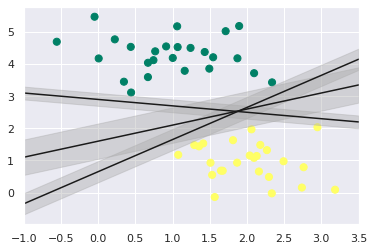

In [178]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none',
                     color = '#AAAAAA', alpha = 0.4)
    
plt.xlim(-1, 3.5)

## What is the hard margin?

***



From vector algebra the distance from the origin along the direction $w$ to a point $x$ is given by

$$\frac{w^T x}{\sqrt{w^T w}}$$

The $margin$ between the hyperplanes for the classes is the difference between the two distances along the direction of $w$ which is

$$\frac{w^T x}{\sqrt{w^T w}}(x_+ - x_-) = \frac{2}{\sqrt{w^T w}}$$

To maximize the the distance between two hyperplanes, we need to minimise the length $w^T w$. We know that for each $x^n$ we have a corresponding class label $y^n \in \left \{ +1, -1 \right \}$. So to classify the training labels correctly and maximize this margin, the optimzation problem is equivalent to:

$minimize\ \frac{1}{2}w^Tw$ subject to the constraints  $y^n(w^Tx^n +b)\geq 1$, and $n =1,..., N.$

Notice that this formulation is a *quadratic programming* problem -- something we know how to work with. This is known as a hard margin SVM  due to the presence of the exact classification constraint "$\geq 1$", which means that the points used as support vectors exactly fall on the boundary of the margin.

# SVM in practice:

In [179]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Visualizing the SVM decision boundaries:

In [180]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

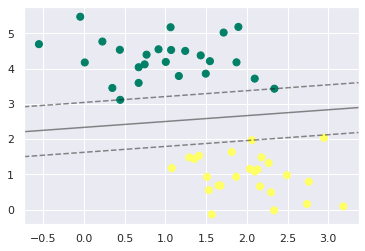

In [181]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(model);

In [182]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## Discussion:

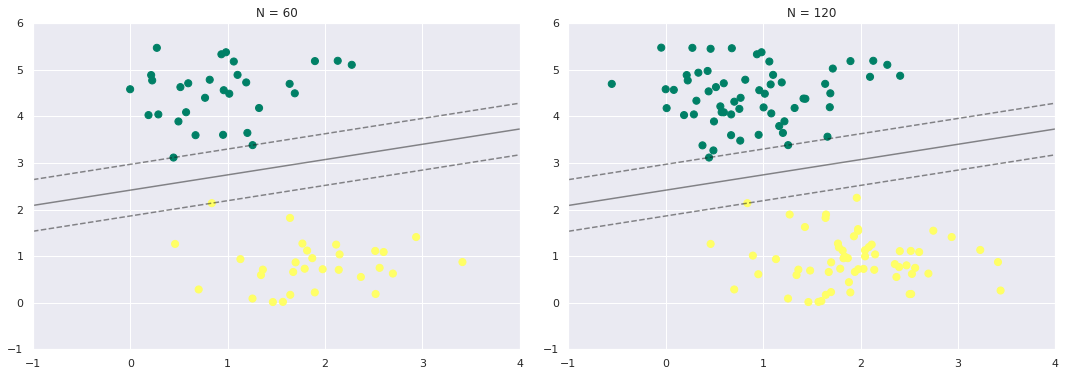

In [183]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

## Interactive visualization:

In [184]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(10, 200, 10), ax=fixed(None));

interactive(children=(IntSlider(value=10, description='N', max=200, min=10, step=10), Output()), _dom_classes=…

## The Kernel trick and non-linear boundaries:

In working with linear algebra and linear regression, we have come across a version of kernels before, in the form of basis functions. We use a similar approach with kerenels, where our data is projected into a higher-dimensional space $\Re^d$ defined by a polynomial $\Phi$ of order $\mathbb{Q}$ and a basis function, and thereby fit for nonlinear relationships with a linear classifier.

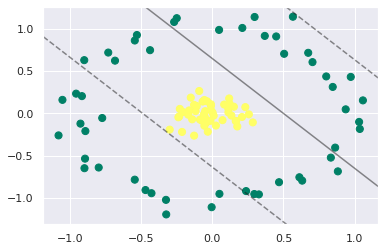

In [185]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(clf, plot_support=False);

On running the cell a couple of times, I think you can tell that there is no linear decision boundary that will ever be able to separate the data. Here is where kernels come in handy. We can project our data into a high dimensional space where there exists a linear separater. One widely used projection is computed using a *radial basis function* centered on the middle clump.

In [186]:
r = np.exp(-(X ** 2).sum(1))

## Visualizing higher-dimensional projections:

In [187]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='summer')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

In [188]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

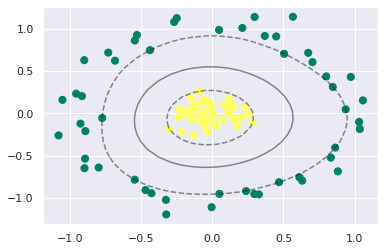

In [189]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## **Face Recognition Project**
***
***

In [190]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person= 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


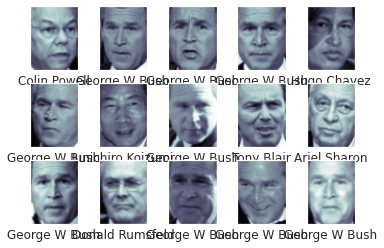

In [191]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks=[], yticks=[], xlabel = faces.target_names[faces.target[i]])

In [192]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components = 150, whiten = True, random_state =142)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [193]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)  

In [194]:
from sklearn.model_selection import learning_curve, GridSearchCV
param_grid =  {'svc__C': [1, 5, 10, 50], 
               'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [195]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

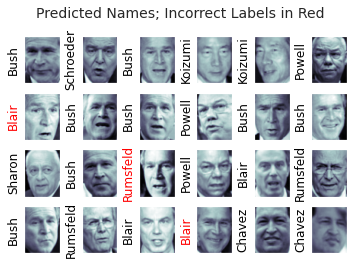

In [196]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks = [], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i]==ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [197]:
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.87      0.76        15
     Colin Powell       0.82      0.87      0.84        68
  Donald Rumsfeld       0.71      0.77      0.74        31
    George W Bush       0.94      0.83      0.88       126
Gerhard Schroeder       0.85      0.74      0.79        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.85      0.92      0.88        12
       Tony Blair       0.80      0.98      0.88        42

         accuracy                           0.84       337
        macro avg       0.82      0.83      0.82       337
     weighted avg       0.85      0.84      0.84       337



Text(89.18, 0.5, 'Predicted Label')

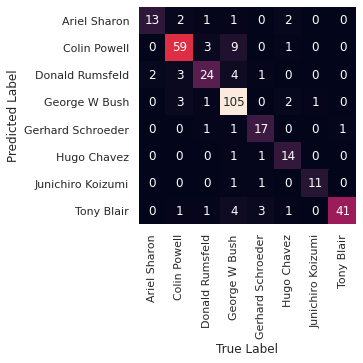

In [198]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names, 
            yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')